# Week 3 - Univariate Analysis

## Please run the cells of the notebook as you get to them while reading

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# 1. Lesson: Bar charts and univariate graphs

Let's make a dataset (in this case, just a series) which is weighted to have more small values than large values.  By squaring a random number between 0 and 1, we ensure that half (those whose initial value is below 0.5) are below 0.25, while the other half are between 0.25 and 1.  This means that most of the values are small, and it's more interesting than analyzing a perfectly uniform dataset.  This kind of trick - transforming one random variable to get another - can generate a variety of random datasets for you.  We then multiply by 100 to get a number between 0 and 100.

In [4]:
np.random.seed(0)
lesson_series = np.round(np.random.random(size = 1000)**2 * 100, 2)
lesson_series[0:10] # check the first ten values.  Are they mostly on the small side?

array([30.12, 51.15, 36.33, 29.69, 17.95, 41.72, 19.15, 79.53, 92.86,
       14.7 ])

In [5]:
import seaborn as sns

In the plot below, you can see a histogram of the values in the series.  For some reason, it decided to have exactly 11 bins (we allowed it to choose the number of bins.)  Most values - about 300 of them - are between 0 and 9, and the next most likely bin is between 9 and 18.  Since there are 1000 values, the total of the bars should be 1000.

<Axes: ylabel='Count'>

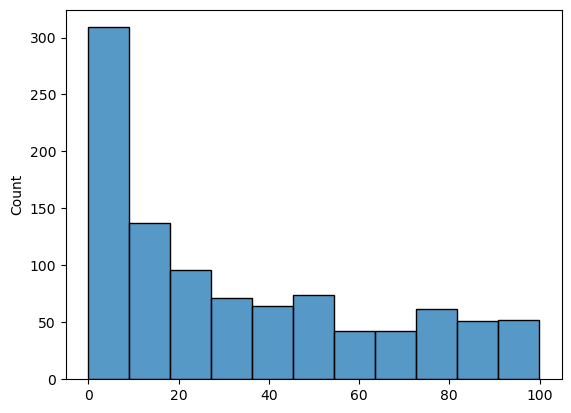

In [6]:
sns.histplot(lesson_series)

There are 11 bins or bars, a number which by default is chosen by seaborn.  We can reproduce this manually to (hopefully) see the same values as numbers. I'm not sure that this second histogram is guaranteed to be exactly the same, but it looks the same to me:

In [7]:
np.histogram(lesson_series, bins = 11)[0]

array([309, 137,  96,  71,  64,  74,  42,  42,  62,  51,  52], dtype=int64)

What happens if we override seaborn and choose the number of bins ourselves?  We could choose a much larger number of bins:

<Axes: ylabel='Count'>

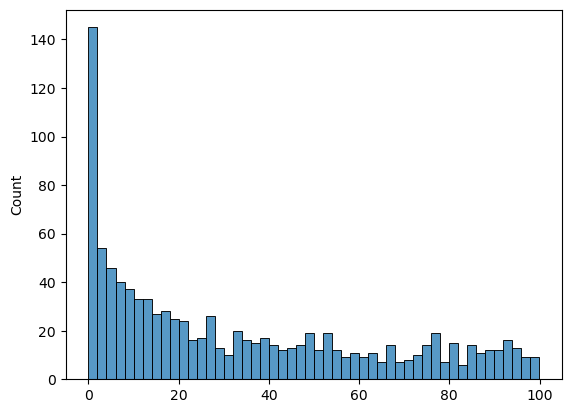

In [8]:
sns.histplot(lesson_series, bins = 50)

One disadvantage of this 50 bin picture is that the outliers are worse.  That is, the graph wobbles up and down a bit more randomly.  That's because there are fewer values in each bin, so there's more of a role for chance to take effect.  If we had many more data points and/or fewer bins, we could get rid of this wobble.

<Axes: ylabel='Count'>

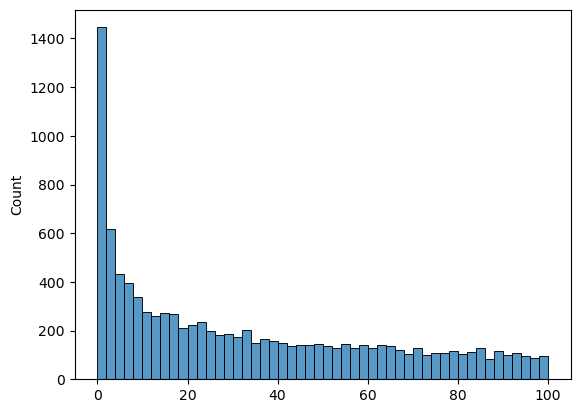

In [9]:
lesson_series_2 = np.round(np.random.random(size = 10000)**2 * 100, 2)
sns.histplot(lesson_series_2, bins = 50)

Here you can see that because the number of bins is the same as in the second graph above, but for more data, the histogram is a smoother graph.  Why does more data make for a smoother graph?  Something for you to think about.  I said it's because a larger number of data points in each bin reduces the role of chance - but why is that?

Here is a KDE (Kernel Density Estimate) plot.  It's just the same histogram, but drawn smoothly.  The KDE plot doesn't have a "number of bins."  It's always drawn the same way.  In this case, because of the smoothness of the curve, it seems that x-values less then zero and above 100 are still plotted, even though there were no such values in the dataset.  This seems like a drawback of the KDE plot, especially if the viewer is unprepared for this aspect of the plot.

<Axes: ylabel='Density'>

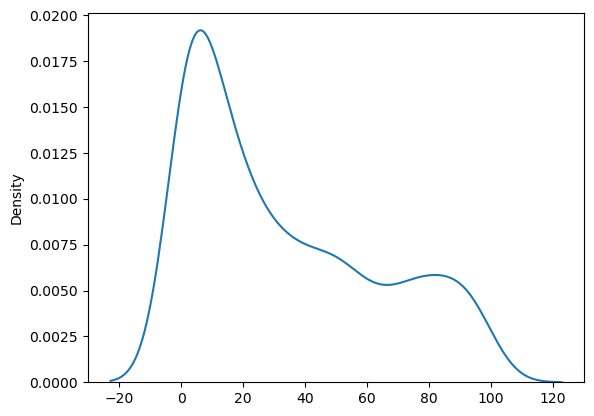

In [10]:
sns.kdeplot(lesson_series)

We could also draw a box plot.  This time, to construct the data I used a fourth power rather than squaring, with only 100 data points, so that the points are even more concentrated toward the small numbers.  It turns out that this will create a more interesting boxplot.  The top and bottom edges of the box are the 75th and 25th percentile, respectively, and the top and bottom "whiskers" show a larger range which is a multiple of 1.5 times the the box height.  (The bottom whisker cannot be see because it's pushed against the bottom of the graph.)  The filled-in box shows that half of the values are between about 0 and 30 on the y-axis.  Is that what you'd expect?  The 25th and 75th percentile of the original uniform random variable are at 0.25 and 0.75.  Taken to the fourth power and multiplied by 100 (remember, that's how we constructed our sample), that's 0.25\*\*4 * 100 = 0.4 and 0.75\*\*4 * 100 = 32.  It's plausible that those are the height of the bottom and top of the box.  We can see that a small number of samples are above the top whisker; they are shown as individual dots.

<Axes: >

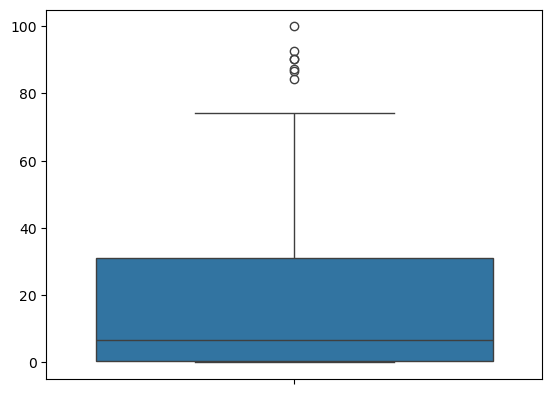

In [11]:
lesson_series_3 = np.round(np.random.random(size = 100)**4 * 100, 2)
sns.boxplot(lesson_series_3)

If we go back to the original lesson_series with the squared values, there will be two whiskers, because it isn't so strongly weighted toward small values:

<Axes: >

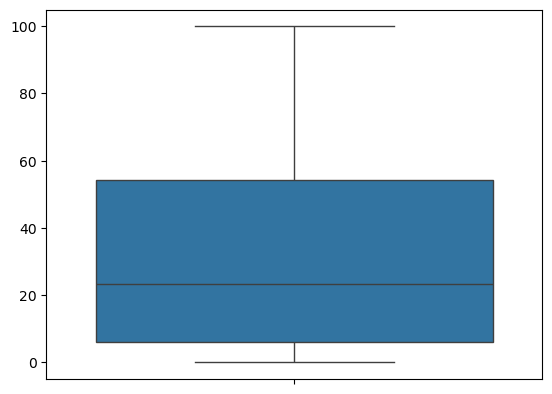

In [12]:
sns.boxplot(lesson_series)

Going back to the fourth power series, another histogram variant is the violin plot.  This simply combines a kde plot (turned on its side and forming two side of the violin) with a boxplot:

<Axes: >

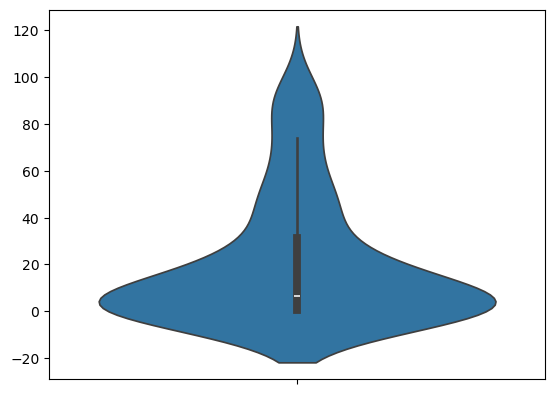

In [13]:
sns.violinplot(lesson_series_3)

Finally, a swarm plot shows the histogram (turned on its side and doubled, as with the violin plot) but showing each individual point.

<Axes: >

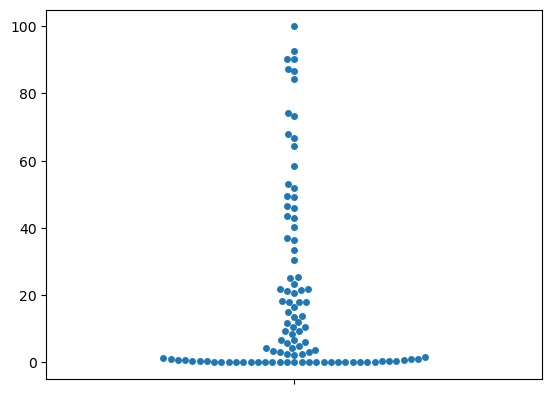

In [14]:
sns.swarmplot(lesson_series_3)

# 2. Weekly graph question

Below are a histogram and table representation of the same data.  A species of bird is being analyzed, and each individual's body length in inches has been measured.

Please write a short explanation of the pros and cons of these two representations.  Which would you choose?  How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [15]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 10000
data = np.random.normal(size = num_data) + 6
df = pd.DataFrame(data.T, columns = ["data"])

In [16]:
histnums = np.histogram(df["data"])
histcounts = histnums[0]
histmins = histnums[1][0:-1]
histmaxes = histnums[1][1:]

In [17]:
pd.DataFrame(np.array([histcounts, histmins, histmaxes]).T, columns = ["count", "minval", "maxval"])

,count,minval,maxval
0,10.0,2.259899,3.014075
1,110.0,3.014075,3.768252
2,579.0,3.768252,4.522428
3,1710.0,4.522428,5.276604
4,2833.0,5.276604,6.030780
5,2688.0,6.030780,6.784956
6,1479.0,6.784956,7.539132
7,487.0,7.539132,8.293308
8,97.0,8.293308,9.047484
9,7.0,9.047484,9.801660


<Axes: ylabel='Frequency'>

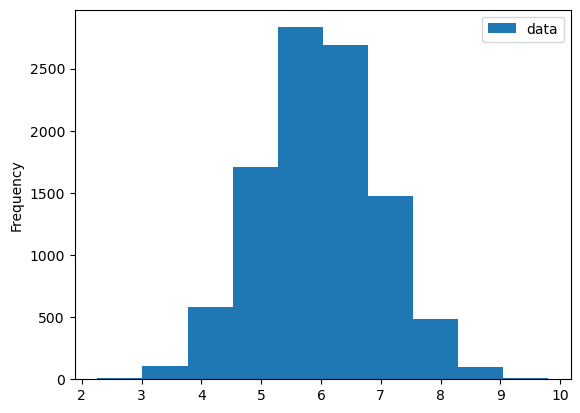

In [18]:
df.plot.hist()

Histogram vs. Table for species of bird analyzed for Bird Body Length Data

Both the histogram and the table represent the same underlying data — bird body lengths — but both graphs serve different purposes.

Histogram
Pros: Provides a clear visual summary of the distribution; patterns like clustering or skewness are easy to see.
Cons: Lacks precise numbers; interpretation depends on bin width and visual clarity.

Table
Pros: Shows exact bin ranges and counts, making it useful for precise analysis or reporting.
Cons: Harder to visually grasp the overall shape or trends in the data.

I would choose the histogram for communicating insights, as it makes the distribution more visually intuitive.
To improve clarity, visually interesting , clear and informative
I would like to add following:
Add a title, axis labels, and gridlines
Possibly include a vertical line to show the mean or median
The table can be included as a supplement for detailed numeric reference.

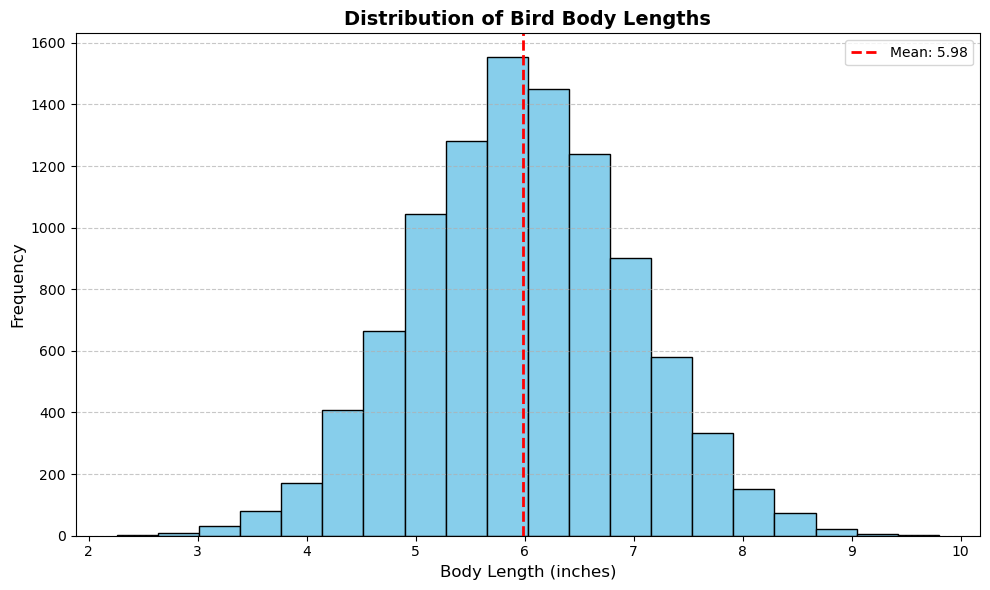

In [19]:
# To imoirve histogram 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
num_data = 10000
data = np.random.normal(size=num_data) + 6
df = pd.DataFrame(data.T, columns=["data"])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df["data"], bins=20, color='skyblue', edgecolor='black')

# Add mean line
mean_val = df["data"].mean()
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_val:.2f}')

# Add labels and title
plt.title("Distribution of Bird Body Lengths", fontsize=14, fontweight='bold')
plt.xlabel("Body Length (inches)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# 3. Homework - Amusement Park Rides

Now let's imagine we have some data about how many times different visitors to an amusement park used each ride, as well as how much money they spend at the amusement park.  Each sample represents a single visit by a single visitor on a given date.

In [20]:
num_visits = 10000
np.random.seed(0)

In [21]:
df = pd.DataFrame(columns = ["VisitDate"])

In [22]:
start = datetime(2010, 1, 1)
end = datetime(2024, 1, 1)
numdays = (end - start).days
random_days = np.random.randint(0, numdays, size = num_visits)
s = start + pd.to_timedelta(random_days, unit='D')
s = s.sort_values()
df["VisitDate"] = s

In [23]:
df["IsAdult"] = np.random.choice([True, True, False], size = num_visits)

In [24]:
df["MartianRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 3 + [3] * 1 + [10], size = num_visits) * df["IsAdult"]

In [25]:
df["TeacupRide"] = np.random.choice([0] * 2 + [1] * 5 + [2] * 3 + [5] * 2, size = num_visits) * ~df["IsAdult"]

In [26]:
df["RiverRide"] = np.random.choice([0] * 8 + [1] * 3 + [2] * 2, size = num_visits) * df["IsAdult"] + np.random.randint(1, 5, size = num_visits) * ~df["IsAdult"]

In [27]:
df["MoneySpent"] = np.round(np.random.random(size = num_visits)**2 * 100, 2)

In [28]:
df.iloc[0:5]

,VisitDate,IsAdult,MartianRide,TeacupRide,RiverRide,MoneySpent
0,2010-01-01,False,0,1,4,10.30
1,2010-01-01,True,3,0,0,38.77
2,2010-01-01,True,0,0,0,79.34
3,2010-01-01,True,0,0,1,87.84
4,2010-01-02,False,0,1,2,18.65


1. Find the mean, median, and mode for how many times visitors rode each ride.  See Week 1 for Google advice on this.

In [29]:
# Calculate and display mean, median, mode for each ride
# Columns to analyze
rides = ["MartianRide", "TeacupRide", "RiverRide"]

# Calculate and display mean, median, mode for each ride
for ride in rides:
    mean_val = df[ride].mean()
    median_val = df[ride].median()
    mode_val = df[ride].mode()[0]  # take the first mode if multiple
    print(f" {ride}")
    print(f"   Mean:   {mean_val:.2f}")
    print(f"   Median: {median_val}")
    print(f"   Mode:   {mode_val}")
    print("-" * 40)

 MartianRide
   Mean:   0.91
   Median: 0.0
   Mode:   0
----------------------------------------
 TeacupRide
   Mean:   0.59
   Median: 0.0
   Mode:   0
----------------------------------------
 RiverRide
   Mean:   1.20
   Median: 1.0
   Mode:   0
----------------------------------------


2. Use groupby() to find the mean, median, and mode for how many times each ride was ridden on each given day.

Suggested Google search or ChatGPT prompt: 
I first tried: "How do I use groupby to find the mean over each day in my DataFrame?" but Google didn't help me.

Then I tried: "How do I find the mean over each date in a dataframe?"  Sometimes, you have to try multiple searches.

This gives me a very helpful site, where someone is doing the same thing we are:

https://stackoverflow.com/questions/40788530/how-to-calculate-mean-of-some-rows-for-each-given-date-in-a-dataframe

In [30]:
# Code Using groupby()
#Define which columns (rides) to group
import seaborn as sns
import matplotlib.pyplot as plt

ride_columns = ["MartianRide", "TeacupRide", "RiverRide"]

# Group by VisitDate and calculate mean
mean_by_day = df.groupby("VisitDate")[ride_columns].mean()

# Group by VisitDate and calculate median
median_by_day = df.groupby("VisitDate")[ride_columns].median()

# Group by VisitDate and calculate mode (custom function to get first mode)
mode_by_day = df.groupby("VisitDate")[ride_columns].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

Answer: Metric	               What It Shows
mean_by_day	           Average number of times each ride was ridden per day

median_by_day	       The median number of rides per day

mode_by_day	           The most frequent count of each ride per day

To understand ride usage patterns over time, I used groupby() on the VisitDate column to calculate the mean, median, and mode for each ride per day:
Grouped the data by VisitDate
Calculated:
Mean: average number of times each ride was used per day
Median: middle value of ride usage per day
Mode: most frequently occurring number of rides per day (using a custom lambda function)

It Matters:
The mean shows overall trends (e.g., on busy days rides are used more).
The median is less sensitive to outliers (like a rare day with extreme ride use).
The mode reveals the most common ride count, helpful for operational decisions (e.g., staffing needs).

3. Find the standard deviation and variance of the count for each ride.

Suggested Google search or ChatGPT prompt: "How do I find the standard deviation of a Series in pandas documentation?" and similar query for variance.

I included the word "documentation" because this task likely involves applying one single function for standard deviation and another for variance, so I expected that I could find a single documentation page for each that would cover my needs.  I get these:

https://pandas.pydata.org/pandas-docs/dev/reference/api/pandas.Series.var.html

https://pandas.pydata.org/docs/reference/api/pandas.Series.std.html

In [31]:
# Columns representing rides
ride_columns = ["MartianRide", "TeacupRide", "RiverRide"]

# Calculate standard deviation and variance for each ride
for ride in ride_columns:
    std_val = df[ride].std()
    var_val = df[ride].var()
    print(f" {ride}")
    print(f"   Standard Deviation: {std_val:.2f}")
    print(f"   Variance:           {var_val:.2f}")
    print("-" * 40)

 MartianRide
   Standard Deviation: 2.08
   Variance:           4.32
----------------------------------------
 TeacupRide
   Standard Deviation: 1.23
   Variance:           1.52
----------------------------------------
 RiverRide
   Standard Deviation: 1.30
   Variance:           1.68
----------------------------------------


Answer: I used Series.std() and Series.var() from the Pandas documentation to compute the standard deviation and variance for the ride usage columns. These values help describe the spread or variability in the number of times each ride was used. A higher standard deviation means that ride usage varied more from one visitor to another.

4. Find the 90th percentile count for each ride.  That is, if the customers are ordered by their number of rides, and there are 100 customers, how many rides does the 90th person take?  There is a function in pandas that easily does this calculation.

Suggested Google search or ChatGPT prompt: "How do I find a percentile value for a Series in pandas documentation?"

This time, I will let you find the page!  Hint: it's not actually called the "percentile" function.

In [32]:
# Find 90th Percentile Ride Counts
# Define ride columns
ride_columns = ["MartianRide", "TeacupRide", "RiverRide"]

# Calculate 90th percentile for each ride
for ride in ride_columns:
    p90 = df[ride].quantile(0.90)
    print(f" 90th Percentile for {ride}: {p90}")

 90th Percentile for MartianRide: 2.0
 90th Percentile for TeacupRide: 2.0
 90th Percentile for RiverRide: 3.0


Answer: There is a function called :Series.quantile() in pandas
This function allows you to compute any percentile by passing a number between 0 and 1. 
For example: 
series.quantile(0.90)  # 90th percentile
I used the Series.quantile(0.90) method from the pandas documentation to compute the 90th percentile for each ride. This tells us how many times a customer would have ridden that ride if they were in the top 10% of usage. 

5. Plot a histogram of the ride count, using each day as data element as you did in #2.  Use both the total ride count for each day as well as, separately, the mean ride count for each day.

Suggested Google search or ChatGPT prompt: "How do I plot a histogram for a Series in pandas?"

I found this: https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.hist.html

Note: the "by" keyword will not help you plot a count for each day; if you try to use it for this, it will try to draw a separate histogram for each day.

You've already learned how to find the mean ride count for each day.  Can you use a similar idea to find the total ride count for each day?

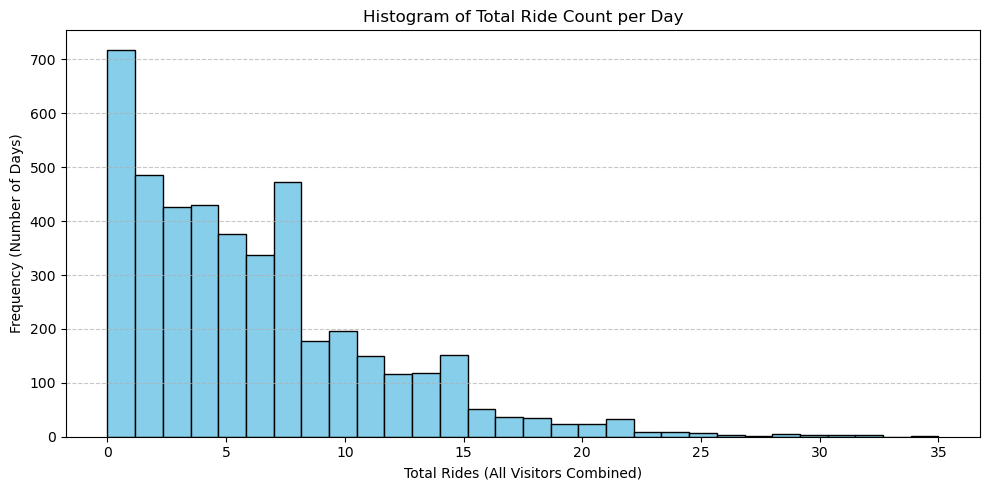

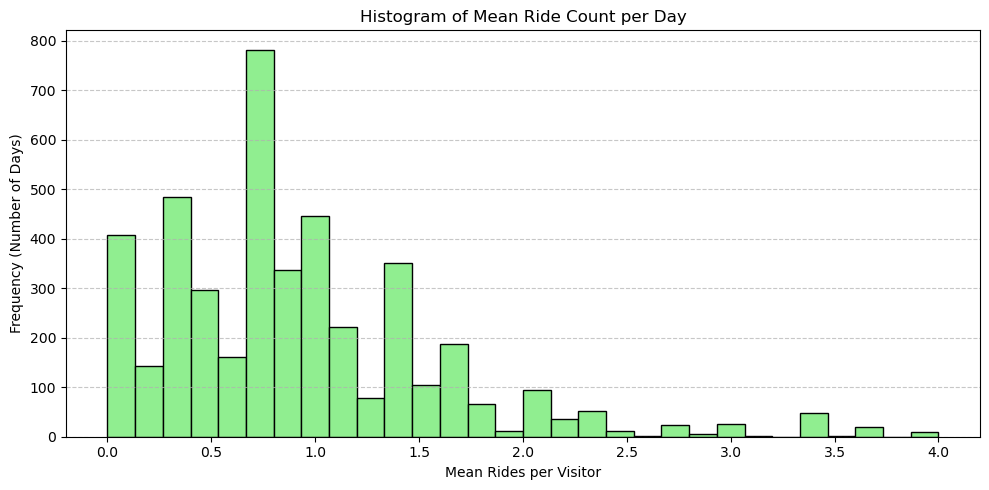

In [33]:
# Ride columns
ride_columns = ["MartianRide", "TeacupRide", "RiverRide"]

# Group by VisitDate: sum and mean for each day
daily_total = df.groupby("VisitDate")[ride_columns].sum().sum(axis=1)
daily_mean = df.groupby("VisitDate")[ride_columns].mean().mean(axis=1)

# Plot total ride count histogram per day
plt.figure(figsize=(10, 5))
daily_total.plot.hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Total Ride Count per Day")
plt.xlabel("Total Rides (All Visitors Combined)")
plt.ylabel("Frequency (Number of Days)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot mean ride count histogram per day
plt.figure(figsize=(10, 5))
daily_mean.plot.hist(bins=30, color='lightgreen', edgecolor='black')
plt.title("Histogram of Mean Ride Count per Day")
plt.xlabel("Mean Rides per Visitor")
plt.ylabel("Frequency (Number of Days)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Answer: To better understand visitor behavior over time, I grouped the data by VisitDate and calculated two key metrics:

Total Ride Count per Day:
The sum of all ride usages by all visitors for each day.

Mean Ride Count per Day:
The average number of rides taken per visitor on each day.

I then created separate histograms using Series.plot.hist() to visualize the distribution of both metrics.

Insights:
The total ride count histogram shows which days were busier overall — reflecting total park activity.

The mean ride count histogram gives insight into how engaged individual visitors were, on average, each day.

These visualizations helped reveal both high-traffic days and variations in visitor behavior, which could be useful for staffing, promotions, or ride maintenance planning.

6. Make a bar chart showing the total number of Adult and Child participants.

Try to formulate your own Google search or ChatGPT prompt.

Here's one page I found:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

which shows some interesting examples for you to use.  I recommend clicking on the first, basic example to see how to use the function.

You can also look up the pandas documentation, which might lead to an entirely different method.

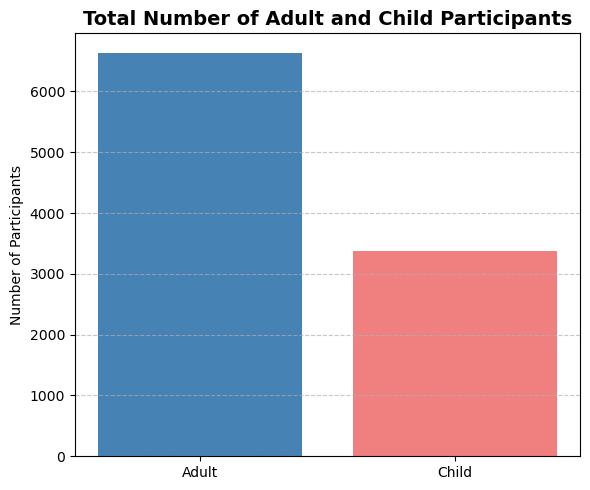

In [34]:
# Count of Adult and Child participants in a bar chart
counts = df["IsAdult"].value_counts()

# Map True = Adult, False = Child
labels = ["Adult", "Child"]
values = [counts[True], counts[False]]

# Plot bar chart
plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=["steelblue", "lightcoral"])
plt.title("Total Number of Adult and Child Participants", fontsize=14, fontweight='bold')
plt.ylabel("Number of Participants")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Answer: I used matplotlib.pyplot.bar() to create a bar chart showing the total number of Adult and Child participants. By using value_counts() on the IsAdult column and mapping the boolean values to meaningful labels, I was able to display a clear visual comparison. This bar chart helps to quickly see the distribution of adult vs. child visitors in the amusement park data.

7. Make a stacked bar chart showing how many Adult and Child visits took the River Ride, with the x-axis showing the number of rides and with two stacked bars (adult, child).  That is, there could be a column for the number of Adults (and Children) who took 0 rides, 1 ride, 2 rides, and so on.

Try to formulate your own Google search or ChatGPT prompt.

For me, the pandas documentation was easier than the matplotlib documentation.

* If you use the pandas method, you might have to one-hot encode the IsAdult column.  You might want names for the new columns other than True and False.  Use df.join or pd.concat to attach the pd.get_dummies table you've created, and then groupby the RiverRide value.

* You will need to end up with a small table with two columns (IsAdult True and False) and an index (RiverRide) as well as a small number of rows (the values of RiverRide)

* That said, if you can come up with another approach, it's fine.

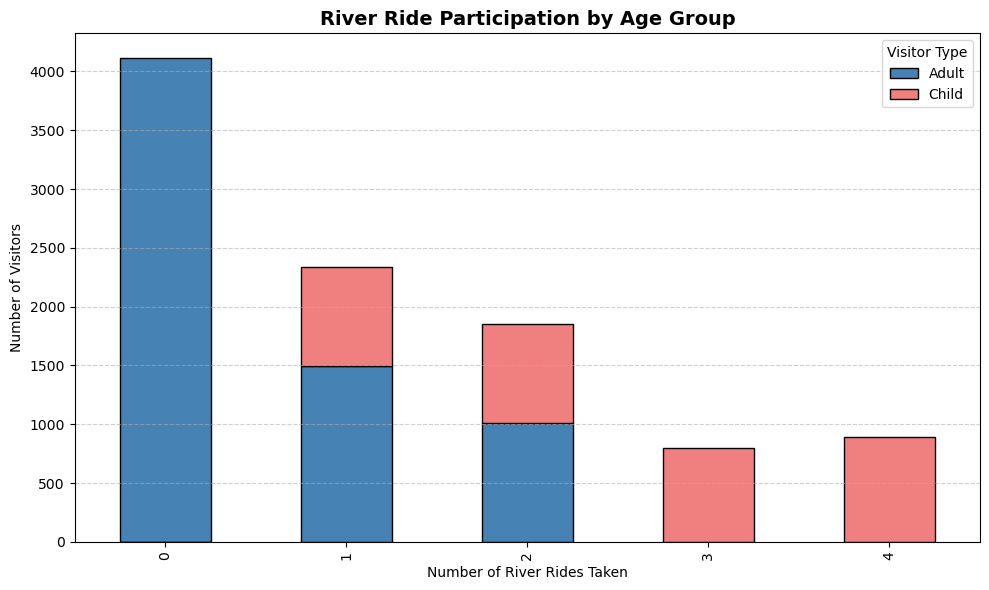

In [35]:
# Create one-hot encoded columns for Adult/Child
is_adult_dummies = pd.get_dummies(df["IsAdult"], prefix="AgeGroup")
# Rename columns for clarity
is_adult_dummies.columns = ["Child", "Adult"]  # False = Child, True = Adult

# Attach to the original DataFrame
df_combined = df.join(is_adult_dummies)

# Group by RiverRide count and sum Adult/Child columns
ride_grouped = df_combined.groupby("RiverRide")[["Adult", "Child"]].sum()

# Sort index for visual clarity
ride_grouped = ride_grouped.sort_index()

# Plot stacked bar chart
ride_grouped.plot(kind="bar", stacked=True, figsize=(10, 6),
                  color=["steelblue", "lightcoral"], edgecolor='black')

plt.title("River Ride Participation by Age Group", fontsize=14, fontweight='bold')
plt.xlabel("Number of River Rides Taken")
plt.ylabel("Number of Visitors")
plt.legend(title="Visitor Type")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Answer:  Using pandas and matplotlib
X-axis: Number of River Rides taken (0, 1, 2, etc.)

Y-axis: Number of visitors

Each bar is stacked:

Lower portion: Adults

Upper portion: Children
I used one-hot encoding on the IsAdult column to create separate Adult and Child flags. Then I grouped the data by RiverRide count and summed these flags to get how many adults and children rode 0, 1, 2, etc., times. Finally, I plotted a stacked bar chart to visualize the age breakdown per ride count. This helped clearly show which age group participated more at each ride frequency level


8. Other tasks

Use seaborn (import seaborn as sns) to create a kernel density estimation (kde) plot.  (You can choose any aspect of the amusement park dataset to plot.)  Here is a tutorial you can read about seaborn:

https://seaborn.pydata.org/tutorial/introduction.html

Seaborn often makes nicer looking graphs than pandas or matplotlib.

Now use seaborn to make a swarm plot, a violin plot, and a box plot.

Which plots are the best for showing this data?

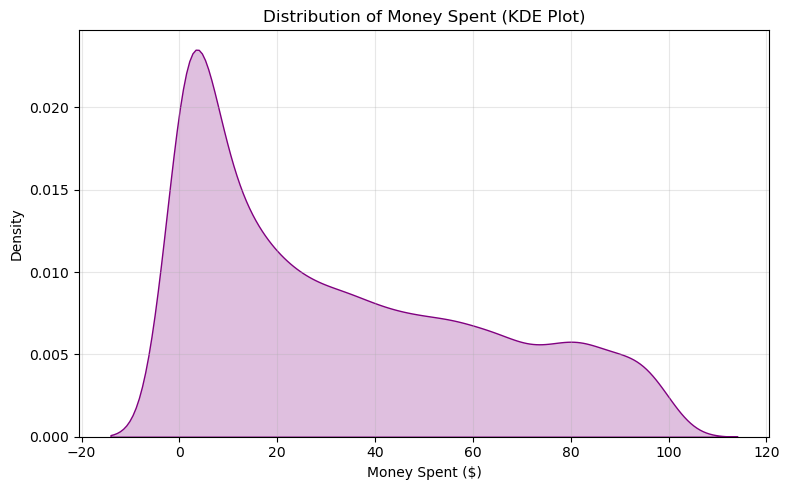

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plot for Money Spent
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="MoneySpent", fill=True, color="purple")
plt.title("Distribution of Money Spent (KDE Plot)")
plt.xlabel("Money Spent ($)")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


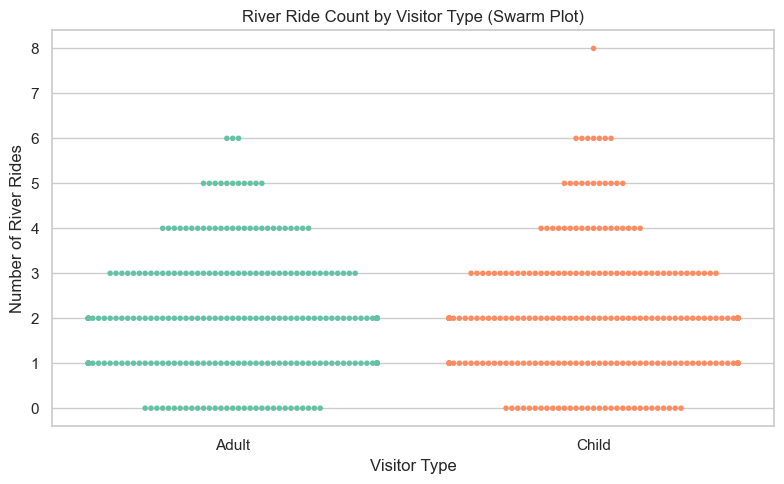

In [44]:
#Swam plot with
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# If not already done, define a sample dataset
np.random.seed(42)
df = pd.DataFrame({
    "IsAdult": np.random.choice([True, False], size=1000),
    "RiverRide": np.random.poisson(lam=2, size=1000)
})

df["VisitorType"] = df["IsAdult"].map({True: "Adult", False: "Child"})
df_sample = df.sample(500, random_state=1)

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

sns.swarmplot(data=df_sample,
              x="VisitorType",
              y="RiverRide",
              hue="VisitorType",
              palette="Set2",
              legend=False,
              size=4)

plt.title("River Ride Count by Visitor Type (Swarm Plot)")
plt.xlabel("Visitor Type")
plt.ylabel("Number of River Rides")
plt.tight_layout()
plt.show()

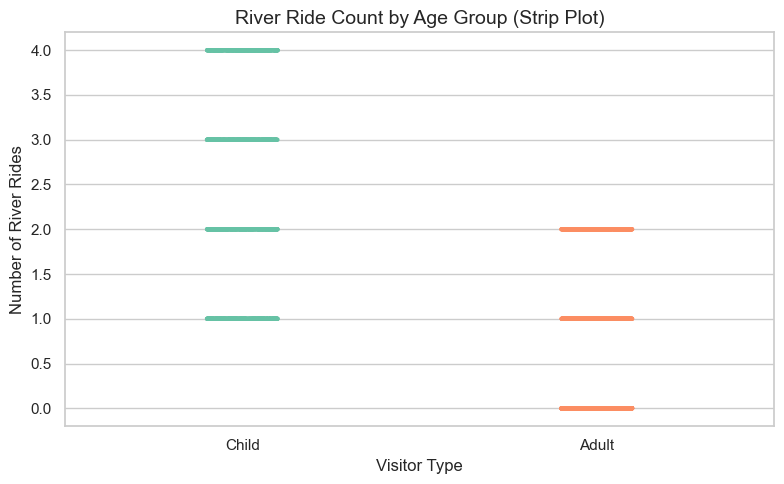

In [40]:
#Stripplot
import matplotlib.pyplot as plt
import seaborn as sns


# Use mapped visitor type for readability
df["VisitorType"] = df["IsAdult"].map({True: "Adult", False: "Child"})

# Prevent overplotting by sampling
df_sample = df.sample(500, random_state=42) if len(df) > 500 else df

# Use stripplot (less accurate spacing, but scalable)
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.stripplot(data=df, x="VisitorType", y="RiverRide", hue="VisitorType",
              palette="Set2", dodge=False, alpha=0.5, jitter=True, size=3, legend=False)

plt.title("River Ride Count by Age Group (Strip Plot)", fontsize=14)
plt.xlabel("Visitor Type")
plt.ylabel("Number of River Rides")
plt.tight_layout()
plt.show()

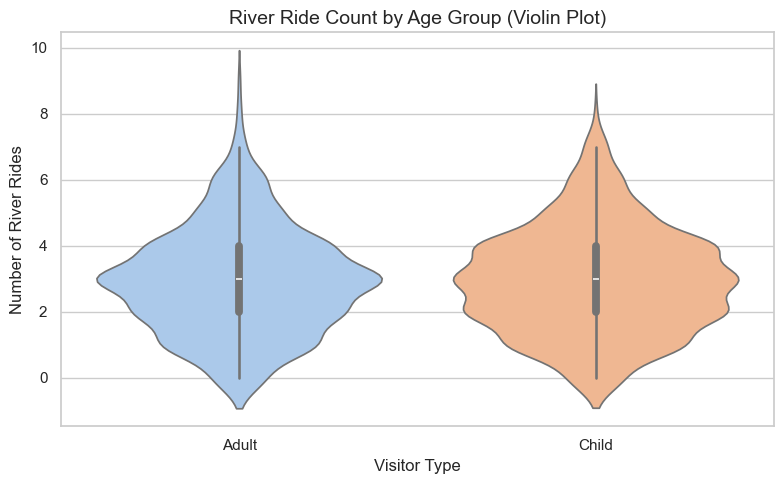

In [47]:
# Violin Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: convert True/False to readable category names
df["VisitorType"] = df["IsAdult"].map({True: "Adult", False: "Child"})

# Plot violin plot with hue to apply palette correctly
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
sns.violinplot(data=df, x="VisitorType", y="RiverRide", hue="VisitorType",
               palette="pastel", legend=False)

plt.title("River Ride Count by Age Group (Violin Plot)", fontsize=14)
plt.xlabel("Visitor Type")
plt.ylabel("Number of River Rides")
plt.tight_layout()
plt.show()

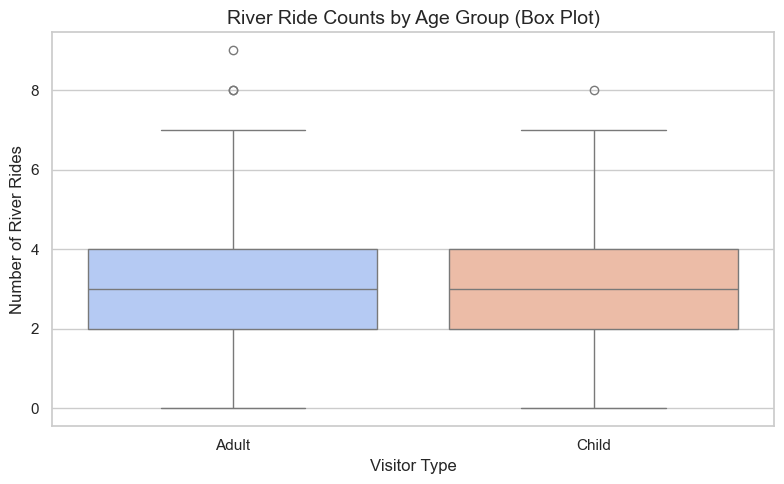

In [48]:
# Box plot
# Create a readable label from the boolean
df["VisitorType"] = df["IsAdult"].map({True: "Adult", False: "Child"})

# Use hue and legend=False to comply with future Seaborn versions
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="VisitorType", y="RiverRide", hue="VisitorType",
            palette="coolwarm", legend=False)

plt.title("River Ride Counts by Age Group (Box Plot)", fontsize=14)
plt.xlabel("Visitor Type")
plt.ylabel("Number of River Rides")
plt.tight_layout()
plt.show()

Answer: Which plot is the best:

Plot Type	          What It Shows Best	        Pros	      Cons
Swarm Plot	
what it shows best : Every individual data point	
pros: Shows exact distribution, clusters, and outliers	
cons:Not suitable for large datasets (overcrowding, slow rendering)
I received an error for Seaborn’s swarmplot() "can't fit all the points on the chart due to overplotting". Swarm plots try to avoid overlapping dots, but if there are too many data points in one category, it gives up and throws this warning.So i had to correct it and try creating a stripplot. stripplot() 

Violin Plot	
what is shows best: Distribution + density + summary stats	
pros:Combines boxplot + KDE, shows shape of data	
cons:Harder to read precise values; can be visually noisy

Violin plot has some warnings as well.

Box Plot
what it shows best:Summary stats: median, quartiles, outliers	
pros:Simple, clean, fast; great for comparing groups	
cons:Doesn’t show full distribution or shape of the data

Box Plot is best for clarity and summary.
Violin Plot is best for storytelling and showing patterns in the data. But in this case i had issues with Swarm and violin plots due to latger number of data points.

Swarm Plot is best only for small datasets or for debug/exploration.Swarm plots try to place every point without overlapping, which becomes hard.

# 4. Storytelling With Data graph

Try to make a scatterplot using amusement park dataset that is similar to the one on page 45, where the two axes are the Teacup Ride count and the River Ride count.  If you want to see individual dots and not a dense swarm of dots, you'll have to cut the dataset down to a small number of points (say, 100 points or so).  You can remove the other points, for instance, and focus on the first 100 points.

Here are some things you could do (you don't have to do all of them):

* Draw a dashed line that roughly separates the adult from child points.

* Draw the points in the adult vs. child region of the graph in different colors.

* Choose the right size and number of dots to make the graph look good.

* Write a word that appears on the dashed line (like AVG in the plot on page 45).

If there are any other graphs in the Storytelling With Data chapter that look interesting, and you want more practice, you can try to reproduce them too.

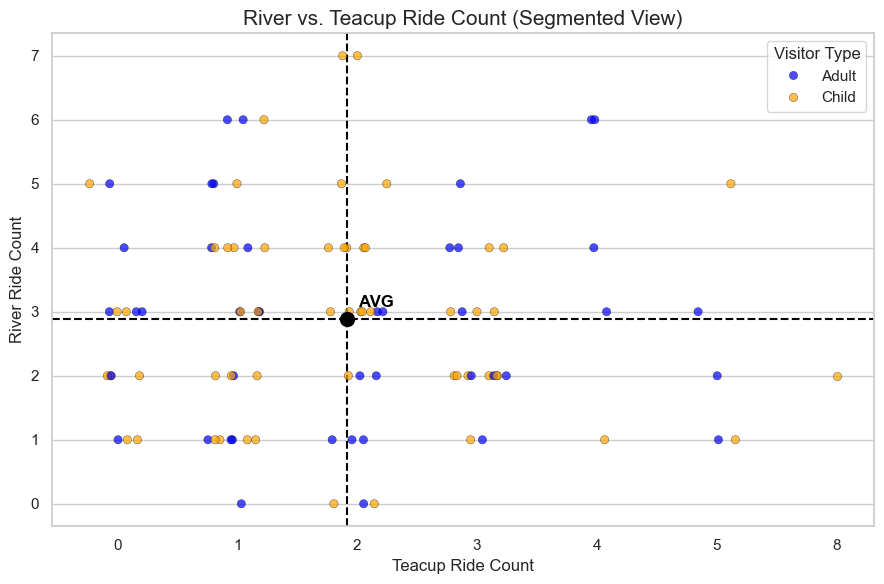

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample dataset again
np.random.seed(42)
df = pd.DataFrame({
    "IsAdult": np.random.choice([True, False], size=1000),
    "TeacupRide": np.random.poisson(2, 1000),
    "RiverRide": np.random.poisson(3, 1000)
})

df["VisitorType"] = df["IsAdult"].map({True: "Adult", False: "Child"})
df_small = df.head(100).copy()

# Compute means for both axes
x_avg = df_small["TeacupRide"].mean()
y_avg = df_small["RiverRide"].mean()

# Plot with jitter to avoid overlap
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")

# Scatterplot with jitter to separate overlapping integer points
sns.stripplot(data=df_small,
              x="TeacupRide",
              y="RiverRide",
              hue="VisitorType",
              palette={"Adult": "blue", "Child": "orange"},
              jitter=0.25,
              size=6,
              alpha=0.7,
              edgecolor="black",
              linewidth=0.3)

# Draw dashed reference lines
plt.axhline(y=y_avg, color='black', linestyle='--', linewidth=1.5)
plt.axvline(x=x_avg, color='black', linestyle='--', linewidth=1.5)

# Label the average point
plt.text(x_avg + 0.1, y_avg + 0.2, "AVG", fontsize=12, fontweight='bold', color="black")

# Draw the average point itself
plt.scatter(x_avg, y_avg, color='black', s=100, zorder=5)

# Labels and title
plt.title("River vs. Teacup Ride Count (Segmented View)", fontsize=15)
plt.xlabel("Teacup Ride Count")
plt.ylabel("River Ride Count")
plt.legend(title="Visitor Type")
plt.tight_layout()
plt.show()



Answers to the plot finding : Summary- River vs. Teacup Ride Count plot
This scatterplot shows the behavior of the first 100 amusement park visitors, comparing how often they used the Teacup Ride (X-axis) and the River Ride (Y-axis). Visitors are color-coded by type:

Adults (blue)
Children (orange)

Key Observations:
Two dashed black lines represent:
The average Teacup Ride count (vertical line)
The average River Ride count (horizontal line)

The intersection point of these lines is labeled “AVG” and marked with a large black dot — this serves as a central reference for interpretation.

Outcome of the plot:
Children (orange dots) tend to cluster to the right (higher Teacup Ride usage) and often below the River Ride average, reflecting a stronger preference for Teacup Rides.
Adults (blue dots) are more scattered across the River Ride axis, with some visiting both rides more evenly, but many are located above the horizontal line, showing a tilt toward the River Ride.

The quadrant pattern suggests:
Top-left quadrant: River-focused riders (mainly Adults)
Bottom-right quadrant: Teacup-focused riders (mainly Children)
Top-right quadrant: High-activity riders (frequent on both)
Bottom-left quadrant: Low-activity or balanced riders

This graph is effective:
Uses color, segmentation, and reference lines to tell a comparative story.
Clearly separates behaviors of different visitor types.
Provides a data-driven visual summary at a glance.